In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [37]:
df = pd.read_csv('Data/credit_risk_dataset.csv', delimiter=',')
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


le projet consiste à determiné lors de la demande de pret si l individu aura ou pas un pret

* person_age = age
* person_income = revenu annuel
* person_home_ownership = Accès à la propriété
* person_emp_length = Durée de l'emploi (en années)
* loan_intent = intention du pret
* loan_grade = note de pret
* loan_amnt = montant du pret
* loan_int_rate = taux d'interet
* loan_status = **statut du pret** ((0 = pas de défaut, 1 = défaut))
* loan_percent_income = Pourcentage de revenu
* cb_person_default_on_file = Défaut historique
* cb_preson_cred_hist_length = Durée de l'historique de crédit



#Nettoyage & EDA

In [38]:
df[["person_emp_length"]].boxplot()

<Axes: >

In [39]:
df[df.person_emp_length > 30]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4
30914,48,70000,MORTGAGE,31.0,HOMEIMPROVEMENT,D,9000,14.54,0,0.13,N,17
31866,47,178000,OWN,31.0,VENTURE,B,9000,10.99,0,0.05,N,17
31867,46,180000,MORTGAGE,31.0,VENTURE,B,18000,9.91,0,0.10,N,11
32263,46,180000,MORTGAGE,31.0,MEDICAL,B,18000,9.91,0,0.10,N,12
32355,78,48000,RENT,41.0,MEDICAL,A,3000,7.51,0,0.06,N,25
32428,58,49000,MORTGAGE,34.0,MEDICAL,D,7500,13.55,1,0.15,Y,24
32515,53,106000,MORTGAGE,38.0,PERSONAL,B,20000,9.88,0,0.19,N,23


In [40]:
df = df.drop(df[df.person_emp_length > 100].index)

In [41]:
df.person_emp_length.value_counts()

person_emp_length
0.0     4105
2.0     3849
3.0     3456
5.0     2946
1.0     2915
4.0     2874
6.0     2666
7.0     2196
8.0     1687
9.0     1367
11.0     740
10.0     696
12.0     575
13.0     426
14.0     335
15.0     238
16.0     165
17.0     129
18.0     104
19.0      64
20.0      42
21.0      38
22.0      19
24.0      10
23.0      10
25.0       8
26.0       6
27.0       5
31.0       4
28.0       3
30.0       2
41.0       1
34.0       1
29.0       1
38.0       1
Name: count, dtype: int64

In [42]:
df.loan_status.value_counts()

loan_status
0    25472
1     7107
Name: count, dtype: int64

In [43]:
df.loan_grade.value_counts()

loan_grade
A    10776
B    10451
C     6458
D     3625
E      964
F      241
G       64
Name: count, dtype: int64

In [44]:
df.loan_status.value_counts()

loan_status
0    25472
1     7107
Name: count, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32579 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32579 non-null  int64  
 1   person_income               32579 non-null  int64  
 2   person_home_ownership       32579 non-null  object 
 3   person_emp_length           31684 non-null  float64
 4   loan_intent                 32579 non-null  object 
 5   loan_grade                  32579 non-null  object 
 6   loan_amnt                   32579 non-null  int64  
 7   loan_int_rate               29463 non-null  float64
 8   loan_status                 32579 non-null  int64  
 9   loan_percent_income         32579 non-null  float64
 10  cb_person_default_on_file   32579 non-null  object 
 11  cb_person_cred_hist_length  32579 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [46]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [47]:
df[df.loan_int_rate.isnull()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


In [48]:
df.loan_int_rate.value_counts().sort_index()

loan_int_rate
5.42     594
5.79     395
5.99     358
6.00      12
6.03     448
        ... 
21.74      5
22.06      1
22.11      3
22.48      1
23.22      1
Name: count, Length: 348, dtype: int64

* il y a des valeurs manquantes dans la colonne loan_int_rate et person_emp_length
* Donc on va remplacer les valeurs manquantes en utilisant le knn 

In [49]:
#from sklearn.impute import KNNImputer

In [50]:
#features_missing = df.columns[df.isnull().any()]
#numerical_features_missing = df[features_missing].select_dtypes(include=np.number)

#numerical_features_missing

In [51]:
#imputer = KNNImputer(n_neighbors=3)
#features_not_missing = imputer.fit_transform(numerical_features_missing)

In [52]:
#d.DataFrame(features_not_missing, columns=numerical_features_missing.columns)

In [53]:
#df = df.drop(columns=numerical_features_missing.columns)

In [54]:
#df = pd.concat([df, pd.DataFrame(features_not_missing, columns=numerical_features_missing.columns)], axis=1)

In [55]:
#supprimer les ligne des valeur manquantes
df = df.dropna(subset=['loan_int_rate', 'person_emp_length'])

In [56]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [57]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [58]:
#df = df.dropna()

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28636 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28636 non-null  int64  
 1   person_income               28636 non-null  int64  
 2   person_home_ownership       28636 non-null  object 
 3   person_emp_length           28636 non-null  float64
 4   loan_intent                 28636 non-null  object 
 5   loan_grade                  28636 non-null  object 
 6   loan_amnt                   28636 non-null  int64  
 7   loan_int_rate               28636 non-null  float64
 8   loan_status                 28636 non-null  int64  
 9   loan_percent_income         28636 non-null  float64
 10  cb_person_default_on_file   28636 non-null  object 
 11  cb_person_cred_hist_length  28636 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


* On va convertir la colonne loan_status en type object pour pouvoir l'utiliser dans les modeles de classification
car elle est actuellement en type int64, ce qui n'est pas approprié pour une variable catégorielle.

In [60]:
df.loan_status = df.loan_status.astype(object)

In [61]:
df[df.person_emp_length > 30]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
30914,48,70000,MORTGAGE,31.0,HOMEIMPROVEMENT,D,9000,14.54,0,0.13,N,17
31866,47,178000,OWN,31.0,VENTURE,B,9000,10.99,0,0.05,N,17
31867,46,180000,MORTGAGE,31.0,VENTURE,B,18000,9.91,0,0.10,N,11
32263,46,180000,MORTGAGE,31.0,MEDICAL,B,18000,9.91,0,0.10,N,12
32355,78,48000,RENT,41.0,MEDICAL,A,3000,7.51,0,0.06,N,25
32428,58,49000,MORTGAGE,34.0,MEDICAL,D,7500,13.55,1,0.15,Y,24
32515,53,106000,MORTGAGE,38.0,PERSONAL,B,20000,9.88,0,0.19,N,23


In [62]:
features_cat = df.select_dtypes(include='object')
features_cat.head()

,person_home_ownership,loan_intent,loan_grade,loan_status,cb_person_default_on_file
1,OWN,EDUCATION,B,0,N
2,MORTGAGE,MEDICAL,C,1,N
3,RENT,MEDICAL,C,1,N
4,RENT,MEDICAL,C,1,Y
5,OWN,VENTURE,A,1,N


In [63]:
features_num = df.select_dtypes(include=np.number)
features_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
1,21,9600,5.0,1000,11.14,0.10,2
2,25,9600,1.0,5500,12.87,0.57,3
3,23,65500,4.0,35000,15.23,0.53,2
4,24,54400,8.0,35000,14.27,0.55,4
5,21,9900,2.0,2500,7.14,0.25,2


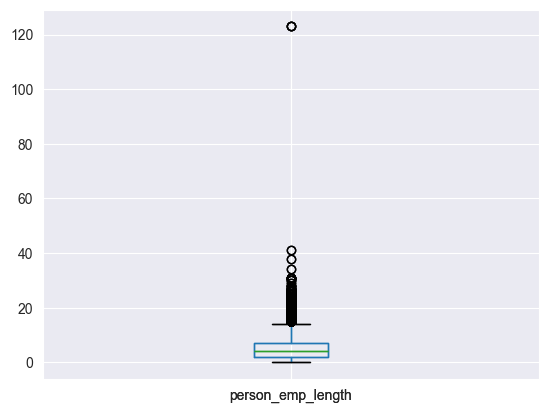

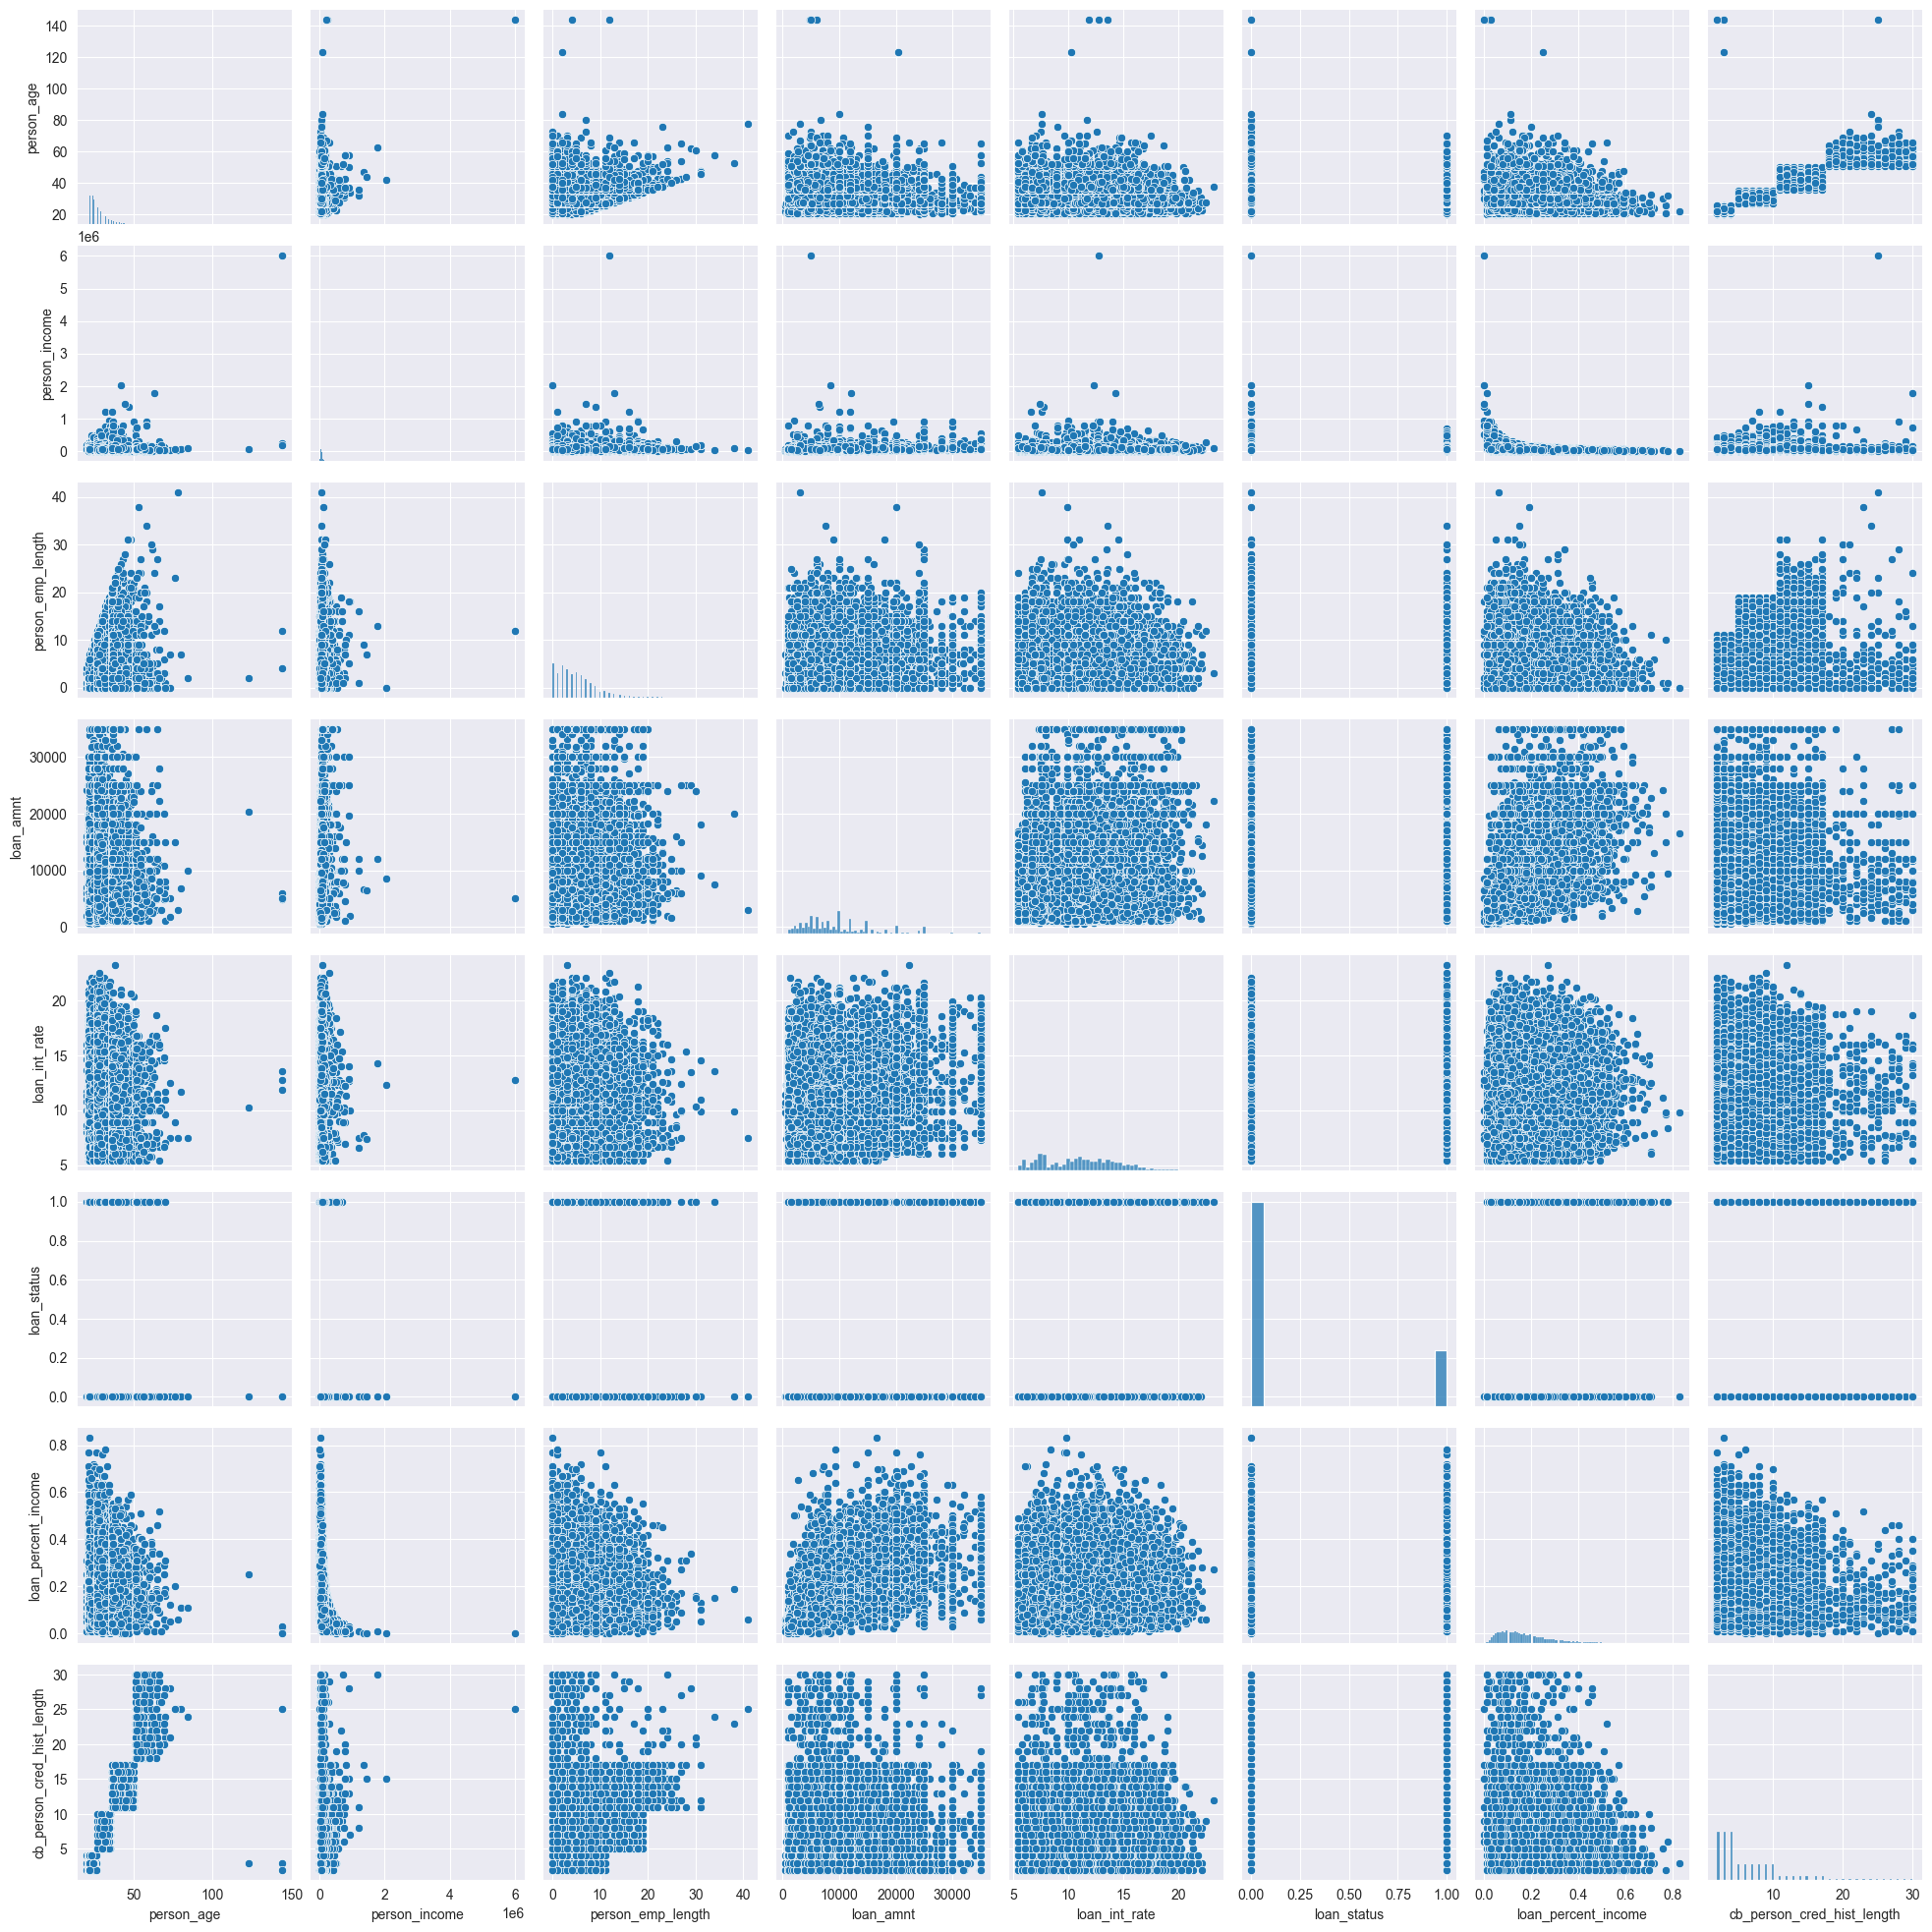

In [64]:
sns.pairplot(df)
plt.show()

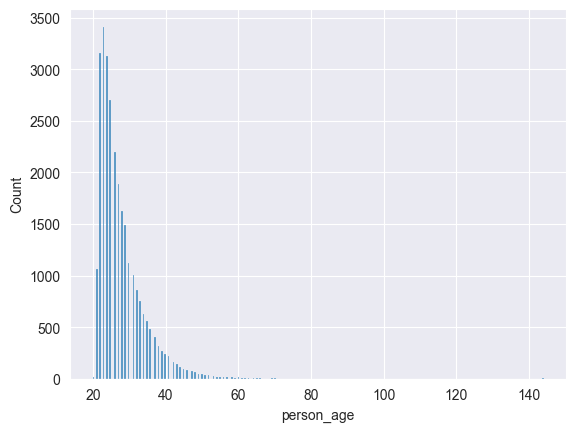

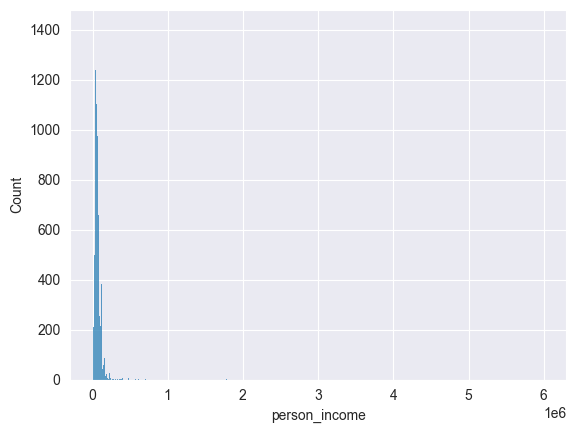

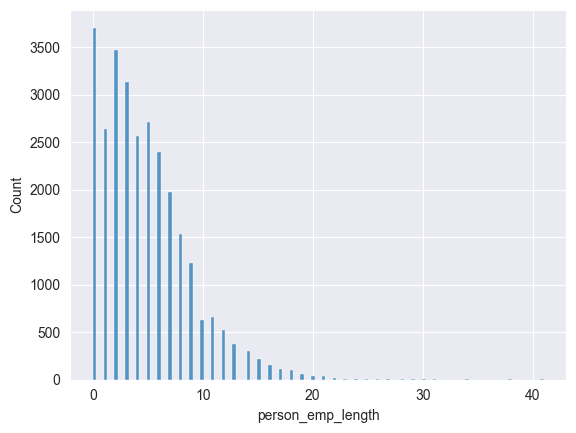

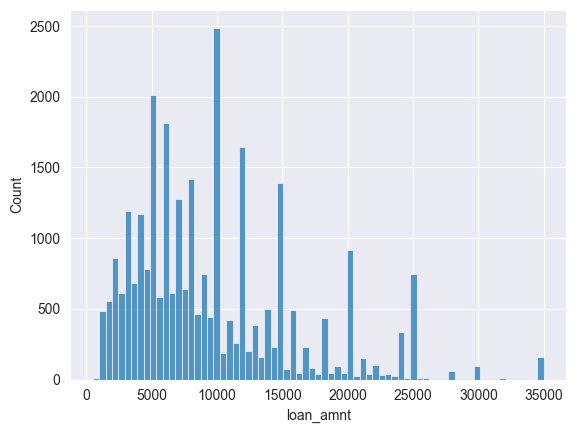

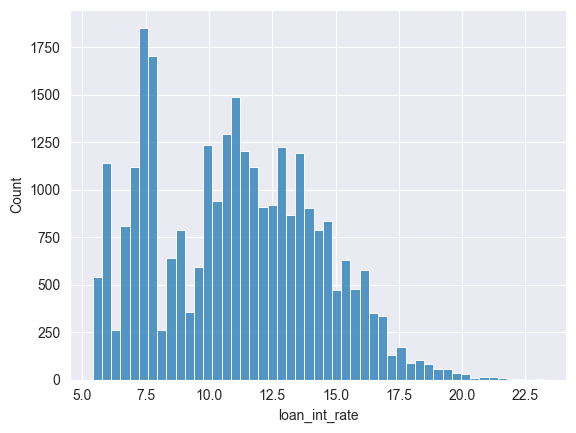

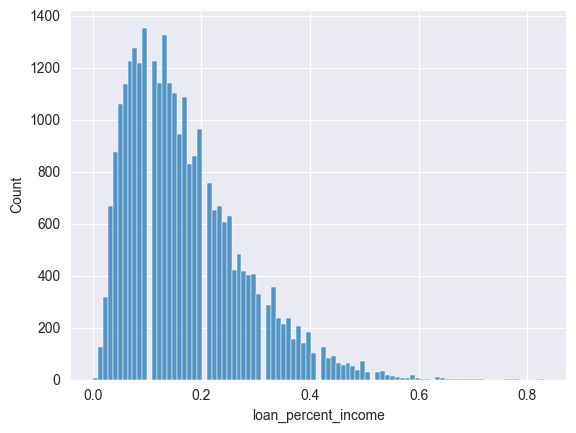

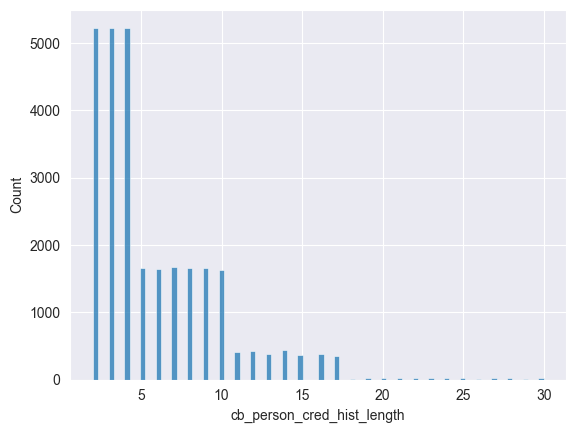

In [65]:
for num in features_num:
  sns.histplot(df[num])
  plt.show()

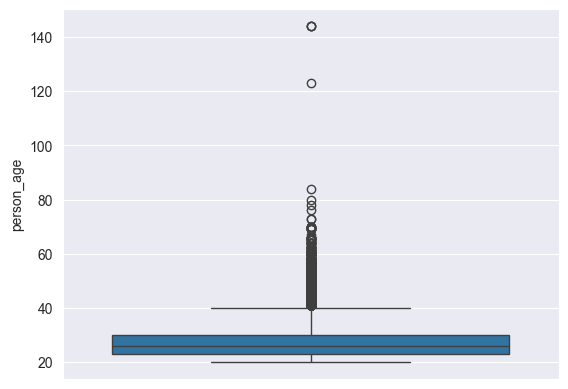

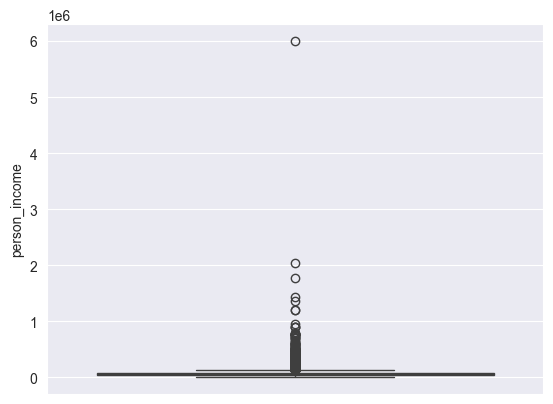

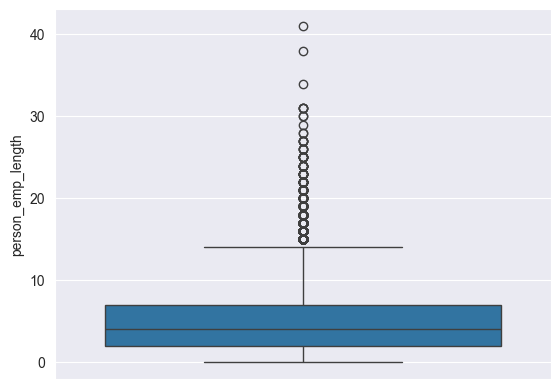

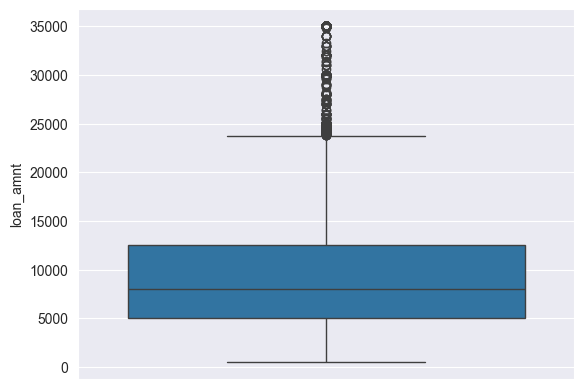

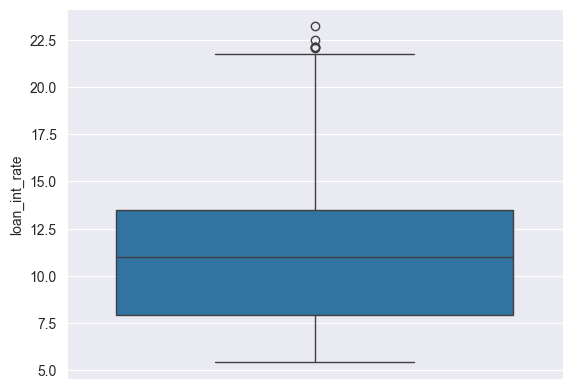

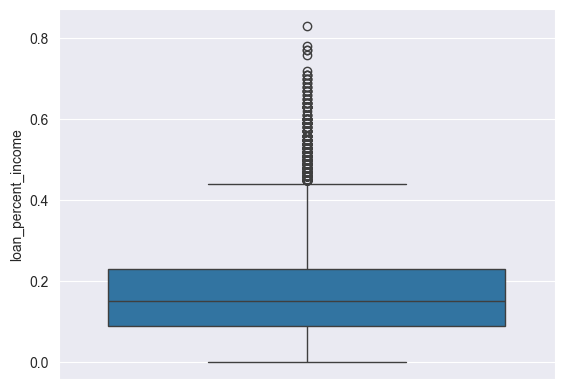

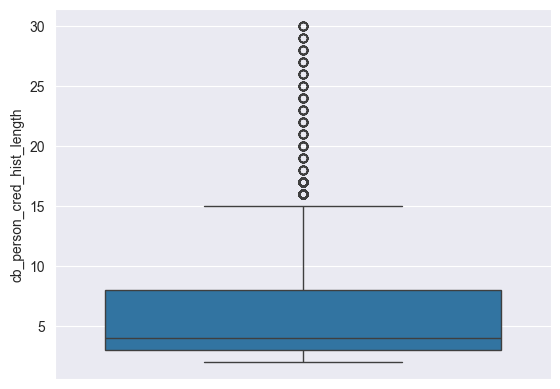

In [66]:
for num in features_num:
  sns.boxplot(df[num])
  plt.show()

* Person age


In [67]:
df.person_age.value_counts().sort_index()

person_age
20       14
21     1060
22     3162
23     3413
24     3130
25     2700
26     2201
27     1887
28     1624
29     1493
30     1126
31     1008
32      860
33      758
34      625
35      559
36      482
37      409
38      321
39      270
40      236
41      218
42      165
43      142
44      116
45       91
46       86
47       76
48       65
49       41
50       45
51       33
52       33
53       26
54       21
55       18
56       14
57       15
58       17
59        5
60       13
61        8
62        6
63        3
64        7
65        5
66        8
67        1
69        5
70        5
73        2
76        1
78        1
80        1
84        1
123       1
144       3
Name: count, dtype: int64

In [68]:
df = df.drop(df[df.person_age > 70].index)

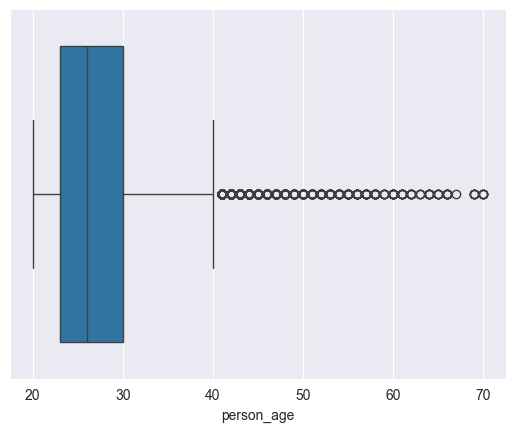

In [69]:
sns.boxplot(data=df , x= "person_age")
plt.show()

* Person income

In [70]:
df.person_income.value_counts().sort_index()

person_income
4000       1
4080       1
4200       1
4800       3
5000       2
          ..
1200000    2
1362000    1
1440000    1
1782000    1
2039784    1
Name: count, Length: 3833, dtype: int64

* loan amount

In [71]:
df.loan_amnt.value_counts().sort_index()

loan_amnt
500        4
700        1
725        1
750        1
800        1
        ... 
33250      1
33950      2
34000      4
34800      1
35000    156
Name: count, Length: 728, dtype: int64

* loan prct income

In [72]:
df.loan_percent_income.value_counts().sort_index()

loan_percent_income
0.00      7
0.01    125
0.02    318
0.03    666
0.04    877
       ... 
0.72      1
0.76      1
0.77      2
0.78      1
0.83      1
Name: count, Length: 77, dtype: int64

* cb_preson_cred_hist_length

In [73]:
df.cb_person_cred_hist_length.value_counts().sort_index()

cb_person_cred_hist_length
2     5223
3     5230
4     5227
5     1660
6     1643
7     1673
8     1665
9     1664
10    1635
11     410
12     426
13     387
14     436
15     370
16     387
17     347
18      15
19      18
20      29
21      17
22      21
23      19
24      26
25      13
26      16
27      18
28      21
29      11
30      19
Name: count, dtype: int64

* person emp length

In [74]:
df.person_emp_length.value_counts().sort_index()

person_emp_length
0.0     3707
1.0     2644
2.0     3467
3.0     3133
4.0     2569
5.0     2715
6.0     2394
7.0     1969
8.0     1534
9.0     1227
10.0     631
11.0     663
12.0     518
13.0     380
14.0     306
15.0     213
16.0     152
17.0     115
18.0      96
19.0      61
20.0      36
21.0      33
22.0      18
23.0       9
24.0       8
25.0       8
26.0       4
27.0       5
28.0       2
29.0       1
30.0       2
31.0       4
34.0       1
38.0       1
Name: count, dtype: int64

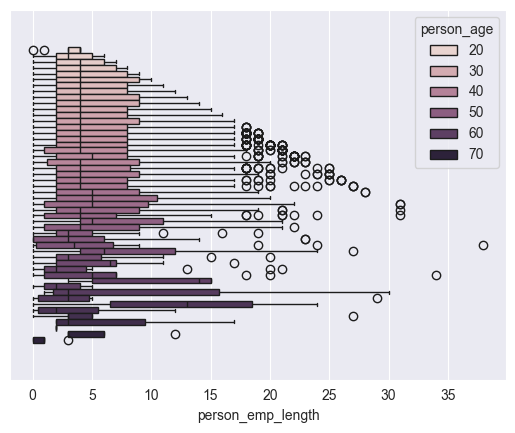

In [75]:
sns.boxplot(data=df , x= "person_emp_length",hue="person_age")
plt.show();

In [76]:
#df = df.drop(df[df.person_emp_length > 37].index)

* loan int rate

In [77]:
df.loan_int_rate.value_counts().sort_index()

loan_int_rate
5.42     541
5.79     374
5.99     339
6.00      12
6.03     415
        ... 
21.74      5
22.06      1
22.11      3
22.48      1
23.22      1
Name: count, Length: 348, dtype: int64

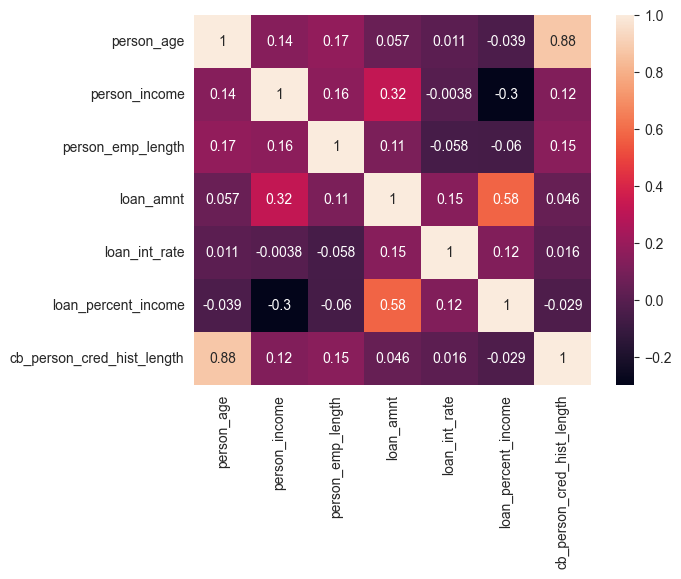

In [78]:
numerical_features = df.select_dtypes(include=np.number).columns
numerical_df = df[numerical_features]

correlation_matrix = numerical_df.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [79]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,28626.000000,2.862600e+04,28626.000000,28626.000000,28626.000000,28626.000000,28626.000000
mean,27.701740,6.642775e+04,4.778523,9655.901977,11.040070,0.169502,5.789597
std,6.130418,5.155199e+04,4.028743,6328.007742,3.229507,0.106366,4.028188
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.945600e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.590000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.230000,8.000000
max,70.000000,2.039784e+06,38.000000,35000.000000,23.220000,0.830000,30.000000


**division du dataset **

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
X_train.shape, X_test.shape , y_train.shape , y_test.shape

((22900, 11), (5726, 11), (22900,), (5726,))

*PREPROCESSING*

In [84]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [85]:
categorical_features = df.select_dtypes(include='object').columns
categorical_features = categorical_features.drop('loan_status')

In [86]:
encoded_train_parts = []
encoded_test_parts = []

for col in categorical_features:
    encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")
    train_encoded = encoder.fit_transform(X_train[[col]])
    test_encoded = encoder.transform(X_test[[col]])

    # Ajouter les colonnes encodées
    encoded_train_parts.append(train_encoded)
    encoded_test_parts.append(test_encoded)

# Fusionner toutes les colonnes encodées
X_train_cat = pd.concat(encoded_train_parts, axis=1)
X_test_cat = pd.concat(encoded_test_parts, axis=1)

# Fusionner avec les colonnes numériques
X_train_final = pd.concat([X_train[numerical_features], X_train_cat], axis=1)
X_test_final = pd.concat([X_test[numerical_features], X_test_cat], axis=1)


In [87]:
# Initialiser le scaler
scaler = RobustScaler()

# Appliquer uniquement sur les colonnes numériques
X_train_scaled_num = pd.DataFrame(
    scaler.fit_transform(X_train_final[numerical_features]),
    columns=numerical_features,
    index=X_train_final.index
)

X_test_scaled_num = pd.DataFrame(
    scaler.transform(X_test_final[numerical_features]),
    columns=numerical_features,
    index=X_test_final.index
)

# Remplacer les anciennes colonnes numériques par les versions scalées
X_train_scaled = X_train_final.copy()
X_test_scaled = X_test_final.copy()

X_train_scaled[numerical_features] = X_train_scaled_num
X_test_scaled[numerical_features] = X_test_scaled_num


In [88]:
y_train.value_counts()

loan_status
0    17940
1     4960
Name: count, dtype: int64

In [89]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

* modélisation

* Randm forest

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score

RF = RandomForestClassifier(n_estimators=200)
RF.fit(X_train_scaled, y_train)
y_pred = RF.predict(X_test_scaled)

print("Accuracy Score:", recall_score(y_test, y_pred))

Accuracy Score: 0.711755233494364


In [91]:
from sklearn.svm import SVC

In [92]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring="recall")

In [93]:
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


,estimator,RandomForestC...stimators=200)
,param_grid,"{'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [100]}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [94]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [95]:
grid_search.best_score_

np.float64(0.7181453822188377)

* SVM/SVC

In [96]:
#grid_svc = GridSearchCV(estimator=SVC(), param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}, cv=3, n_jobs=-1, verbose=2, scoring="recall")
#grid_svc.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'kernel': ['linear', 'rbf']}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [97]:
#grid_svc.best_score_

np.float64(0.6784279215321378)

* Bagging avec SVC

In [98]:
from sklearn.ensemble import BaggingClassifier

bagging_rf = BaggingClassifier(estimator=SVC(), n_estimators=10)

#grid_bag_svc = GridSearchCV(estimator=bagging_rf, param_grid={'n_estimators': [10, 20], 'max_samples': [0.5, 1.0]}, cv=3, n_jobs=-1, verbose=2, scoring="recall")

#grid_bag_svc.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


KeyboardInterrupt: 

In [ ]:
#grid_bag_svc.best_score_

* XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
#grid_xgb = GridSearchCV(estimator=xgb, param_grid={'n_estimators': [100, 200], 'max_depth': [3, 5]}, cv=3, n_jobs=-1, verbose=2, scoring="recall")

#grid_xgb.fit(X_train_scaled, y_train)



In [ ]:
#grid_xgb.best_score_

In [ ]:
from sklearn.metrics import recall_score, accuracy_score, precision_score

print("Recall Score:", recall_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Pipeline de preprocessing et de modélisation


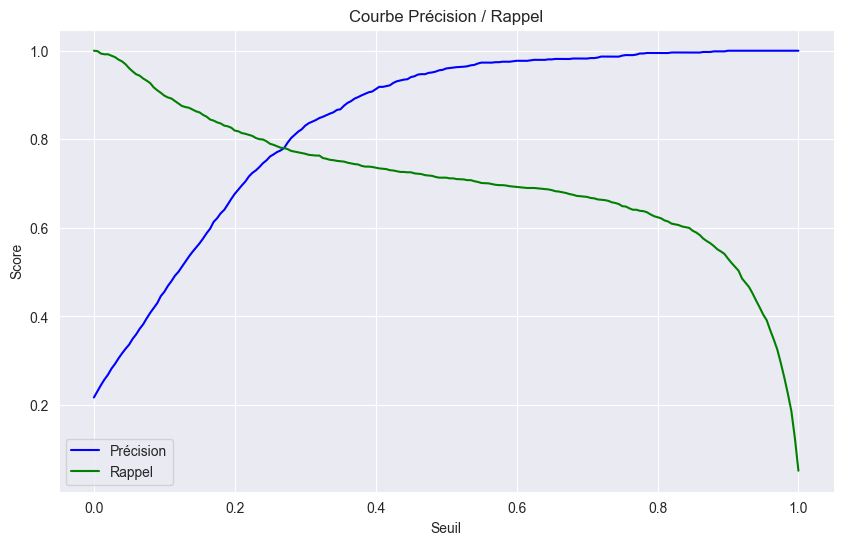

Seuil optimal : 0.23
Recall : 0.8003220611916264
Accuracy : 0.8948655256723717


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_curve, recall_score, accuracy_score
import joblib

# 4. Colonnes
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include="object").columns.tolist()

# 5. Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ("num", RobustScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)
])

# 6. Pipeline complet
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])

# 7. Entraînement
pipeline.fit(X_train, y_train)

# 8. Prédiction des probabilités
y_probs = pipeline.predict_proba(X_test)[:, 1]

# 9. Courbe précision/rappel
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label="Précision", color="blue")
plt.plot(thresholds, recall[:-1], label="Rappel", color="green")
plt.xlabel("Seuil")
plt.ylabel("Score")
plt.title("Courbe Précision / Rappel")
plt.legend()
plt.grid(True)
plt.show()

# 10. Choix d’un seuil
# Exemple : seuil pour recall ≥ 0.8 avec meilleure précision possible
best_threshold = thresholds[np.argmax((recall[:-1] >= 0.8) * precision[:-1])]
print(f"Seuil optimal : {best_threshold:.2f}")

# 11. Évaluation finale
y_pred_thresh = (y_probs >= best_threshold).astype(int)
print("Recall :", recall_score(y_test, y_pred_thresh))
print("Accuracy :", accuracy_score(y_test, y_pred_thresh))




* Un recall de 0.8 implique que nous identifions correctement au moins 80% des emprunteurs à risque. En contrepartie, nous acceptons un risque contrôlé de 20% de faux négatifs, ce qui est cohérent avec les marges de risque de l’entreprise. Cela permet de préserver un bon compromis entre rigueur et opportunité commerciale.

In [ ]:
#matrice de confusion 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

* Vaut mieux avoir un recall élevé pour ne pas rater les clients qui vont rembourser le pret
* Notre but est de reduire les faux négatifs pour ne pas perdre d'argent
* faux positif = client qui va rembourser le pret mais on lui a pas accordé le pret
* faux négatif = client qui ne va pas rembourser le pret mais on lui a accordé le pret
* vrai positif = client qui va rembourser le pret et on lui a accordé le pret
* vrai négatif = client qui ne va pas rembourser le pret et on lui a pas accordé le pret

recall = le nombre de positifs bien prédit (Vrai Positif) divisé par l’ensemble des positifs (Vrai Positif + Faux Négatif).

In [ ]:
# Enregistrer le pipeline et le seuil optimal
joblib.dump(pipeline, "pipeline_credit.pkl")
with open("seuil.txt", "w") as f:
    f.write(str(best_threshold))

In [ ]:
# Charger le pipeline et le seuil optimal
#pipeline_loaded = joblib.load("pipeline_credit.pkl")
#with open("seuil.txt", "r") as f:
#    seuil_optimal = float(f.read())

# Prédire avec le pipeline chargé
#y_probs_loaded = pipeline_loaded.predict_proba(X_test)[:, 1]
#y_pred_loaded = (y_probs_loaded >= seuil_optimal).astype(int)
# Évaluer les performances
#print("Recall (Chargé) :", recall_score(y_test, y_pred_loaded))
#print("Accuracy (Chargé) :", accuracy_score(y_test, y_pred_loaded))

In [101]:
X.head(1)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.1,N,2


In [113]:
X["person_income"].min()

np.int64(4000)